In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%load_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [3]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
ds_avg = ds_all.sel(ensemble=30)

In [4]:
def map_months(plot, ds, cmap, title, year, mi):
    ds = ds.sel(time=slice(year+'-01-01',year+'-12-31'))
    ds_red = ~np.isnan(ds.where(ds['MI']<mi))
    ds_sum = ds_red.sum(dim='time')
    wn.filterwarnings('ignore')
    months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    bounds = np.arange(1,13,1)
    crs = ccrs.PlateCarree()
    X = ds_sum['xt_ocean']
    Y = ds_sum['yt_ocean']
    Z = ds_sum['MI'].squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,months,cmap=cmap,transform=crs,extend='both')
    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')
    return im

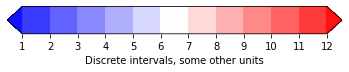

In [121]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.bwr
# cmap.set_over('0.25')
# cmap.set_under('0.75')

bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                boundaries=[0] + bounds + [13],
                                extend='both',
                                ticks=bounds,
                                spacing='proportional',
                                orientation='horizontal')
cb2.set_label('Discrete intervals, some other units')
cb2.ax.set_yticklabels(np.arange(0.0,5.5,0.5))
fig.show()

[]

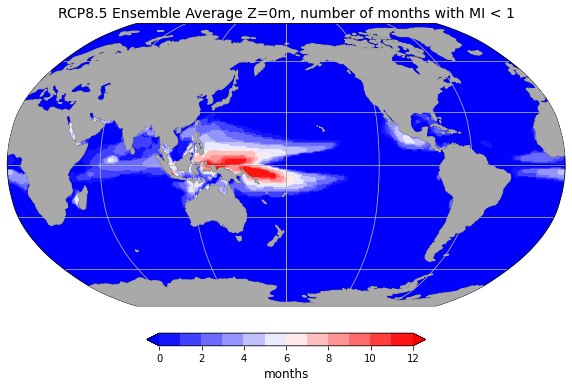

In [5]:
bounds = np.arange(1,13,1)
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
im = map_months(ax, ds_avg, 'bwr', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 1', '2100', 1.0)
cbar = plt.colorbar(im,ax=ax,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5,cmap='bwr')
cbar.set_label('months',fontsize=12)
cbar.ax.set_yticklabels(np.arange(0.0,11.5,0.5))

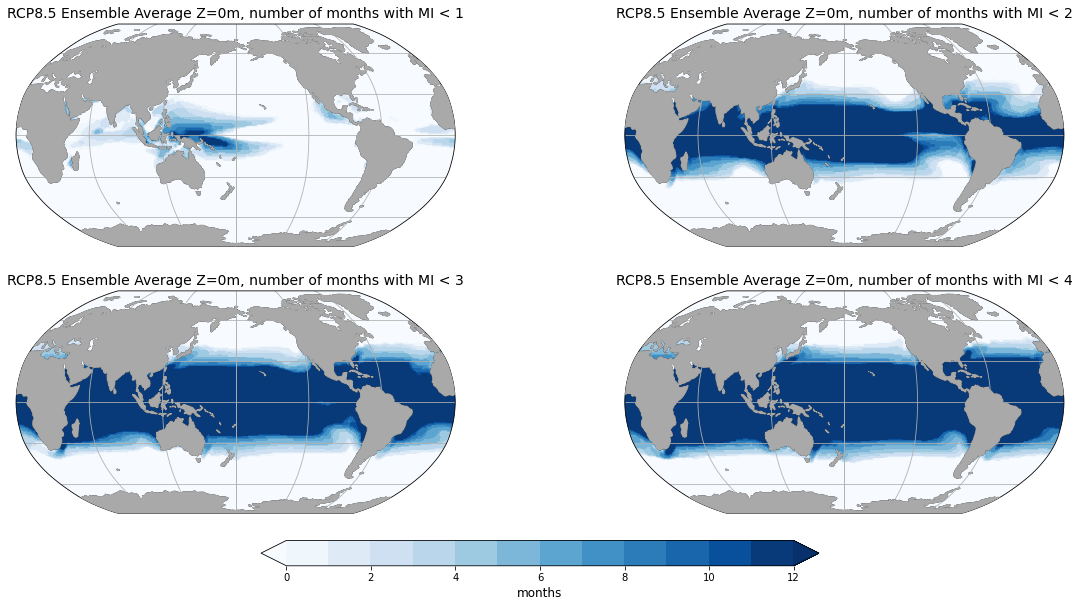

In [125]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
map_months(axs[0,0], ds_avg, 'Blues', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 1', '2100', 1.0)
map_months(axs[0,1], ds_avg, 'Blues', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 2', '2100', 2.0)
map_months(axs[1,0], ds_avg, 'Blues', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 3', '2100', 3.0)
im = map_months(axs[1,1], ds_avg, 'Blues', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 4', '2100', 4.0)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

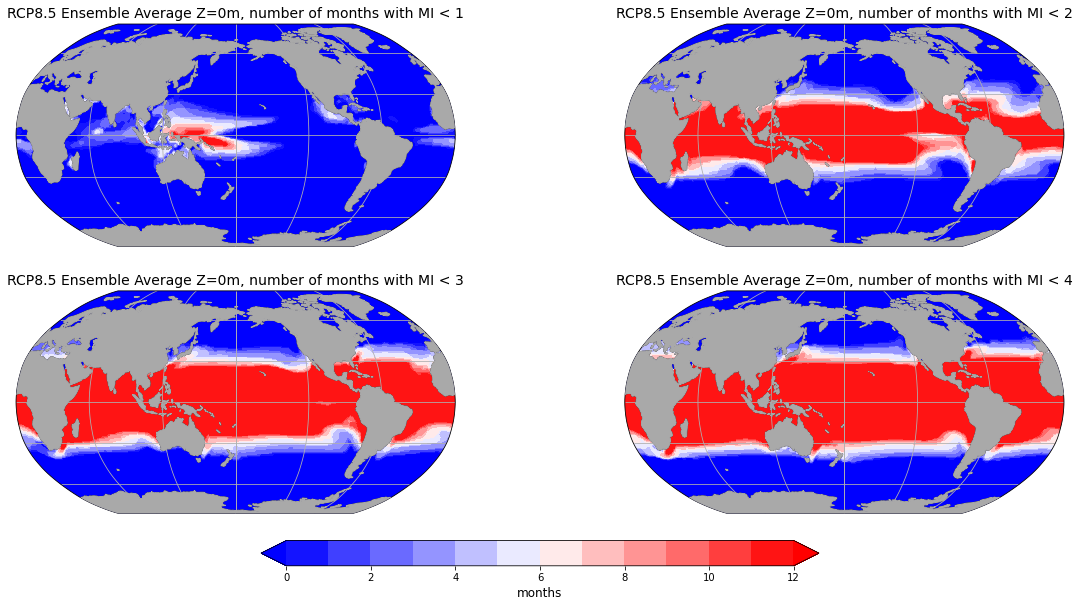

In [126]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
map_months(axs[0,0], ds_avg, 'bwr', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 1', '2100', 1.0)
map_months(axs[0,1], ds_avg, 'bwr', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 2', '2100', 2.0)
map_months(axs[1,0], ds_avg, 'bwr', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 3', '2100', 3.0)
im = map_months(axs[1,1], ds_avg, 'bwr', 'RCP8.5 Ensemble Average Z=0m, number of months with MI < 4', '2100', 4.0)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)